<a href="https://colab.research.google.com/github/carson-edmonds/Loan_Default_Classification/blob/main/CEdmonds_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas module
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import seaborn as sns

# making dataframe
app_data = pd.read_csv("application_train.csv")

# output the dataframe
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# making dataframe
bur = pd.read_csv("bureau.csv")

# output the dataframe
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Top Ten Variables:

1. Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases).

  a. The “Target” variable would be good to track as it shows clients who are not reliable at paying their loans and thus would be a higher risk lending to.


2. Owns a car variable
  
  a. Ashley Cox from Credit Karma (2022) describes how cars can be used as equity for a loan. This variable can thus help ensure that the money is returned if the loan is not paid on time.

3. Owns Realty Variable

  a. Owning a home would imply the owner is financially secure as homes are much larger purchases then other assets and they would be responsible for house payments as well as have equity that could be used as collateral.

4. Income total variable

  a. Nerd Wallet (2023) describes how the income to debt ratio is used to determine if a loan should be approved. The income of someone would be valuable to track to ensure they are making money to be able to pay it back in a reasonable timeframe.

5. Amount Credit

  a. This variable showing how much money the applicant wants to borrow can be compared to the applicant’s income and if they have any assets to use as collateral to cover any remaining amount. This can be used for the Debt to income ratio calculation.

6. Housing type variable

  a. The type of property they live in: Apartment, house, etc.  is further information to determine the property type someone lives in and if they would have equity or not to use as collateral.

7. Age in days variable

  a. Daniel Liberto from Investopedia (2023) describes how age can play a role in loans being approved as someone older may not outlive the length of the loan repayment plan. Keeping this in mind would be key when determining the terms of a loan and whether or not the lender is able to approve the loan.

8. Employed Days Variable

  a. This variable can help determine if the applicant is employed and if they are likely to retire. This can affect the loan repayment plan based on the income level they would maintain during the repayment period.

9. Mobile phone reachable variable

  a. This can show if the applicant is paying for a phone bill and thus responsible to pay bills or loans.

10. Current debt variable

  a. Lending money to someone that has been borrowing a lot and has a lot of debt may not be smart. This can be used with the income to look at the income to debt ratio and determine if approving another loan for them is appropriate.


References:

Cox, A. (2022, May 16). What is an auto equity loan?. Intuit Credit     Karma. https://www.creditkarma.com/personal-loans/i/auto-equity-loan


Liberto, D. (2023, January 31). Are there age requirements to get a home equity loan or line of credit?. Investopedia. https://www.investopedia.com/age-requirements-home-equity-loan-line-of-credit-5235705


NerdWallet. (2023). Debt-to-income ratio: How to calculate your DTI. NerdWallet. https://www.nerdwallet.com/article/loans/personal-loans/calculate-debt-income-ratio

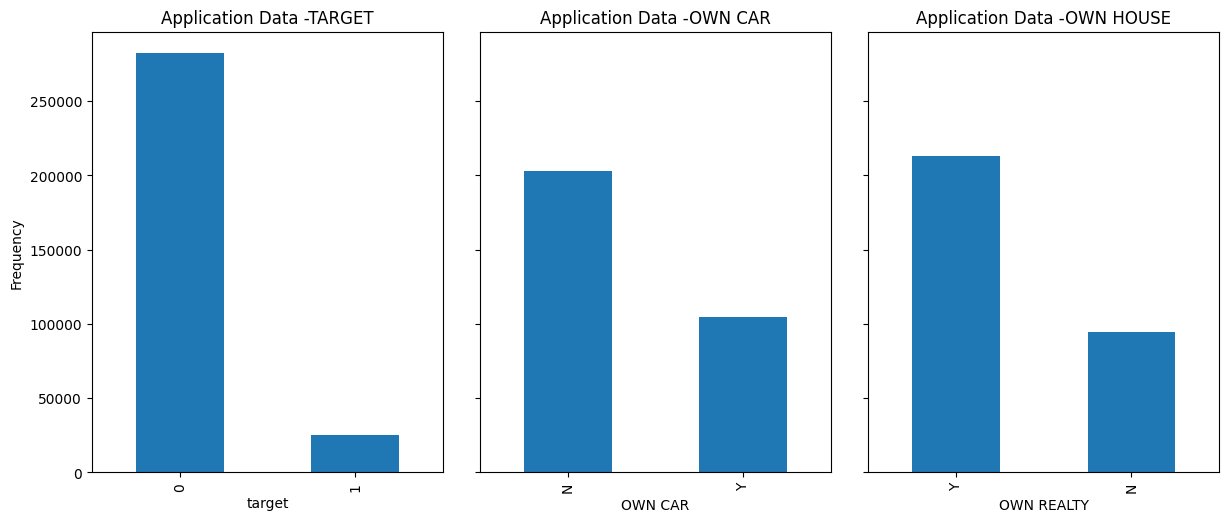

In [ ]:
# Visualize distribution of each variable
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 5))
fig.tight_layout()

app_data['TARGET'].value_counts().plot(ax=ax1, kind='bar', xlabel='target', ylabel='Frequency', title='Application Data -TARGET')

app_data['FLAG_OWN_CAR'].value_counts().plot(ax=ax2, kind='bar', xlabel='OWN CAR', ylabel='Frequency', title='Application Data -OWN CAR')

app_data['FLAG_OWN_REALTY'].value_counts(sort=False).plot(ax=ax3, kind='bar', xlabel='OWN REALTY', ylabel='Frequency', title='Application Data -OWN HOUSE')
plt.show()

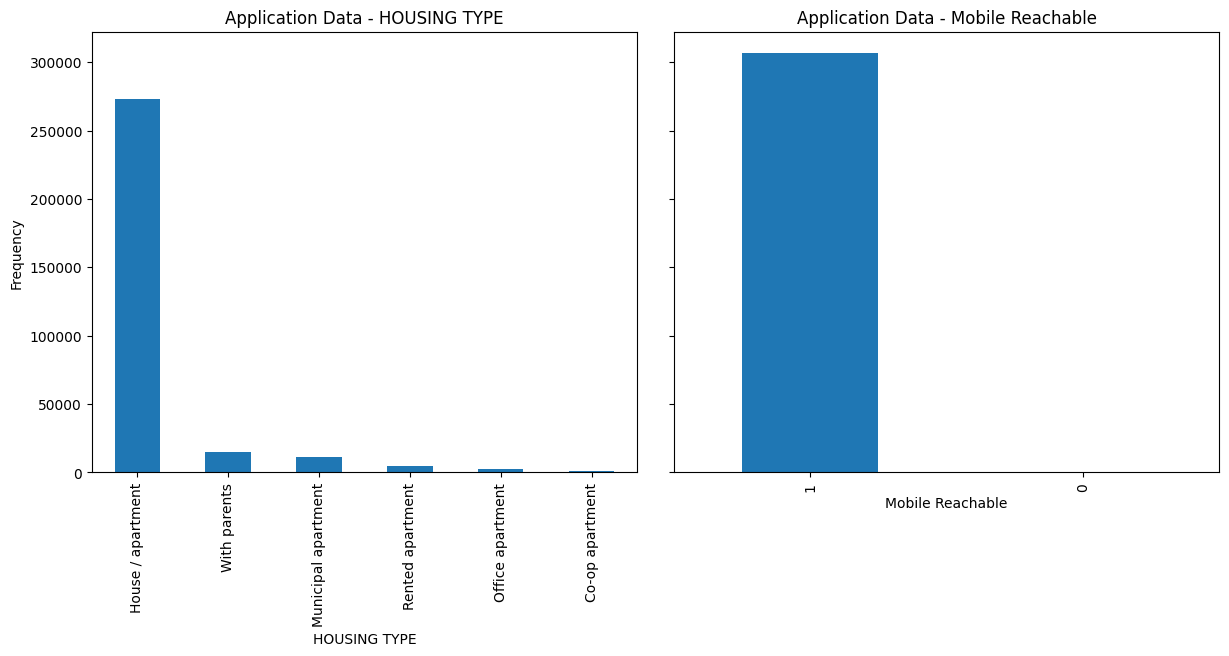

In [ ]:
# Visualize distribution of each variable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
fig.tight_layout()
app_data['NAME_HOUSING_TYPE'].value_counts().plot(ax=ax1, kind='bar', xlabel='HOUSING TYPE', ylabel='Frequency', title='Application Data - HOUSING TYPE')

app_data['FLAG_CONT_MOBILE'].value_counts().plot(ax=ax2, kind='bar', xlabel='Mobile Reachable', ylabel='Frequency', title='Application Data - Mobile Reachable')
plt.show()

(1.0, 200000.0)

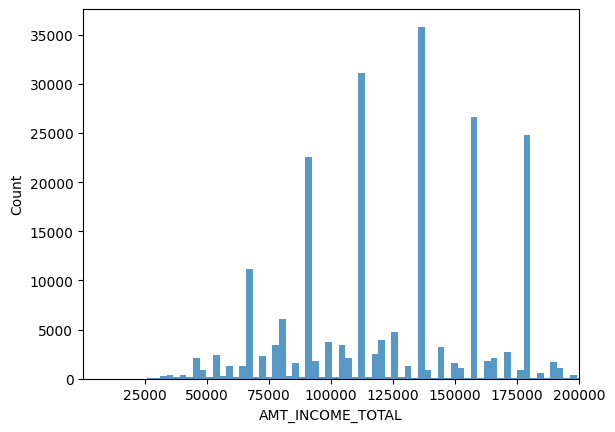

In [ ]:
#sns.histplot(data=app_data, x='AMT_INCOME_TOTAL')
#sns.stripplot(data=app_data, x='AMT_INCOME_TOTAL')
# depict visualization
fig, ax = plt.subplots()
sns.histplot(data=app_data, x='AMT_INCOME_TOTAL')
ax.set_xlim(1, 200000)


<Axes: xlabel='DAYS_BIRTH', ylabel='Count'>

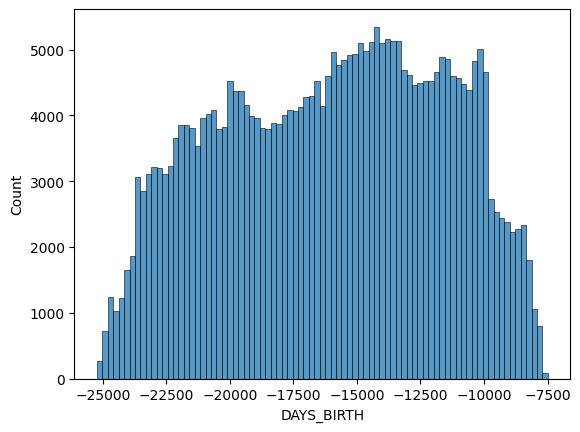

In [ ]:
# depict visualization
fig, ax = plt.subplots()
sns.histplot(data=app_data, x='DAYS_BIRTH')
#ax.set_xlim(1, 200000)

(1.0, 15000.0)

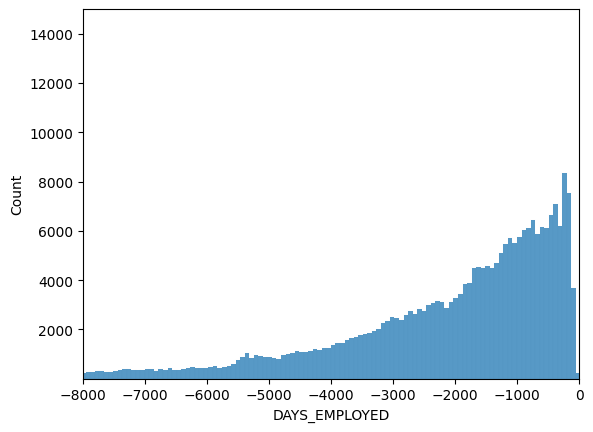

In [ ]:
# depict visualization
fig, ax = plt.subplots()
sns.histplot(data=app_data, x='DAYS_EMPLOYED')
ax.set_xlim(-8000, 1)
ax.set_ylim(1, 15000)

(1.0, 2000000.0)

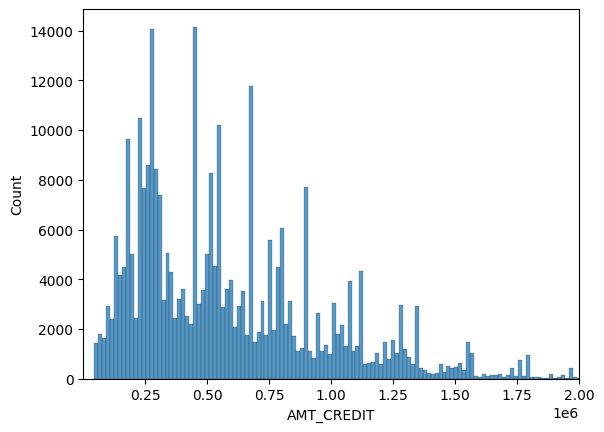

In [ ]:
# depict visualization
fig, ax = plt.subplots()
sns.histplot(data=app_data, x='AMT_CREDIT')
ax.set_xlim(1, 2000000)
#ax.set_ylim(1, 15000)

In [ ]:
bur['AMT_CREDIT_SUM_DEBT'].head()

0         0.0
1    171342.0
2         NaN
3         NaN
4         NaN
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

(-10.0, 2000000.0)

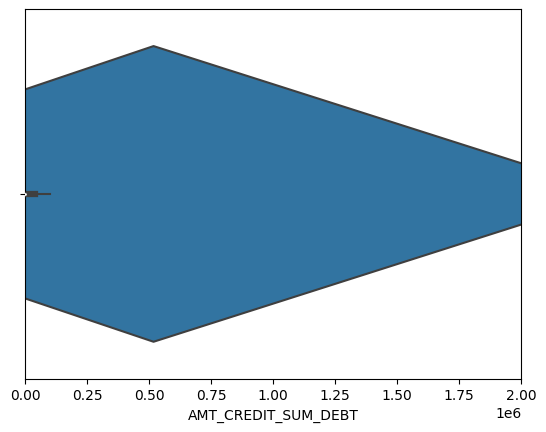

In [ ]:
# depict visualization
fig, ax = plt.subplots()
sns.violinplot(data=bur, x='AMT_CREDIT_SUM_DEBT')
ax.set_xlim(-10, 2000000)
#ax.set_ylim(1, 15)